In [1]:
import numpy as np 
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from collections import Counter
import warnings
warnings.filterwarnings('ignore') 

INSTRUCTIONS
1. Mean poverty rate of each state
1. Most common 15 Name or Surname of killed people
1. Killed People According to Races
1. Box and Swarm Plots in kill data
1. Kill properties (Count Plot)
    * Number of people by gender
    * Kill weapon
    * Age of killed people
    * Race of killed people
    * Most dangerous cities
    * Most dangerous states
    * Having mental ilness or not for killed people
    * Threat types
    * Flee types
<br>

In [2]:
pr = pd.read_csv('PercentagePeopleBelowPovertyLevel.csv', encoding="windows-1252")
sr = pd.read_csv('ShareRaceByCity.csv', encoding="windows-1252")
kill = pd.read_csv('PoliceKillingsUS.csv', encoding="windows-1252")

## 1. Mean poverty rate of each state

In [3]:
pr.head()

,Geographic Area,City,poverty_rate
0,AL,Abanda CDP,78.8
1,AL,Abbeville city,29.1
2,AL,Adamsville city,25.5
3,AL,Addison town,30.7
4,AL,Akron town,42


In [4]:
type(pr.poverty_rate.iloc[0])

str

In [5]:
pr.poverty_rate.value_counts()

0       1464
-        201
7.4      129
6.7      129
10       128
        ... 
84.7       1
69.3       1
86.1       1
73.1       1
86.6       1
Name: poverty_rate, Length: 771, dtype: int64

**INSTRUCTION-1: replace the "-" with zero.**

In [6]:
pr.poverty_rate.replace(['0'],"-",inplace = True)
pr.poverty_rate.replace(['-'],0.0,inplace = True)

In [7]:
pr.poverty_rate.value_counts()

0.0     1665
7.4      129
6.7      129
10       128
10.9     128
        ... 
74.5       1
93.5       1
74.6       1
82.4       1
73.1       1
Name: poverty_rate, Length: 770, dtype: int64

In [8]:
pr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29329 entries, 0 to 29328
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Geographic Area  29329 non-null  object
 1   City             29329 non-null  object
 2   poverty_rate     29329 non-null  object
dtypes: object(3)
memory usage: 687.5+ KB


**INSTRUCTION-2 : Convert type of poverty_rate colum to a numeric type (float).**

In [9]:
pr["poverty_rate"]=pr.poverty_rate.astype("float")

**INSTRUCTION-3 : Plot the Poverty rate of each state. (Demonstrate mean value of each Geogrophic Area (AL, AK, AR).)**

In [10]:
pr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29329 entries, 0 to 29328
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Geographic Area  29329 non-null  object 
 1   City             29329 non-null  object 
 2   poverty_rate     29329 non-null  float64
dtypes: float64(1), object(2)
memory usage: 687.5+ KB


In [11]:
type(pr.poverty_rate.iloc[0])

numpy.float64

In [12]:
pr.groupby("Geographic Area").poverty_rate.mean().head()

Geographic Area
AK    18.678592
AL    20.611795
AR    22.963216
AZ    25.268071
CA    16.888371
Name: poverty_rate, dtype: float64

In [13]:
poverty_rate_of_state=pr.groupby("Geographic Area").poverty_rate.mean()

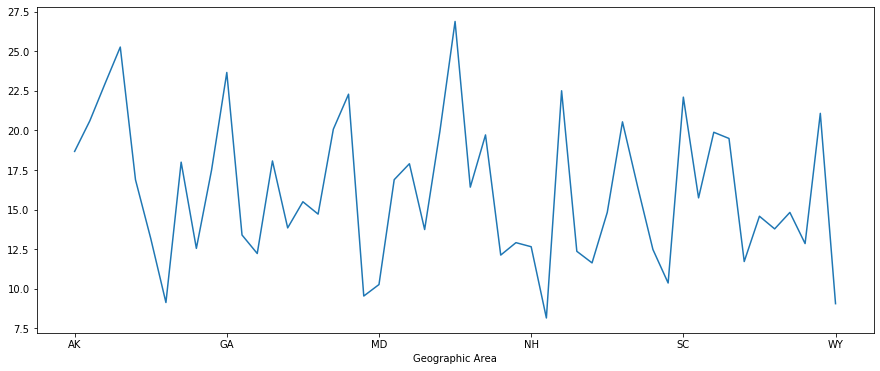

In [14]:
# with pandas
poverty_rate_of_state.plot(figsize=(15,6));

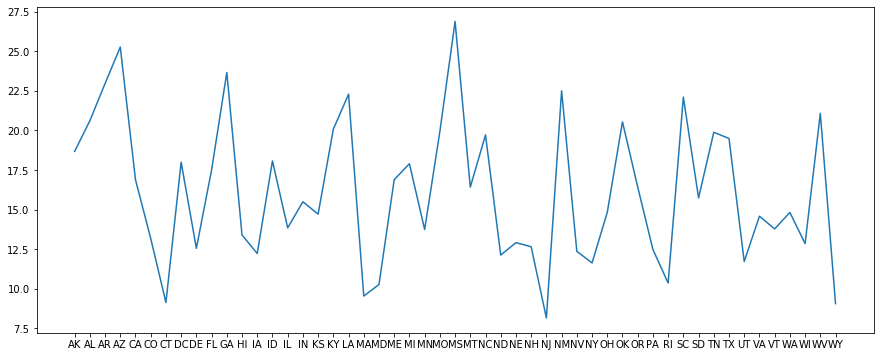

In [15]:
# with matplotlib
plt.figure(figsize=(15,6))
plt.plot(poverty_rate_of_state);

**INSTRUCTION-3.a.1 : Plot With Pandas Built in method:**

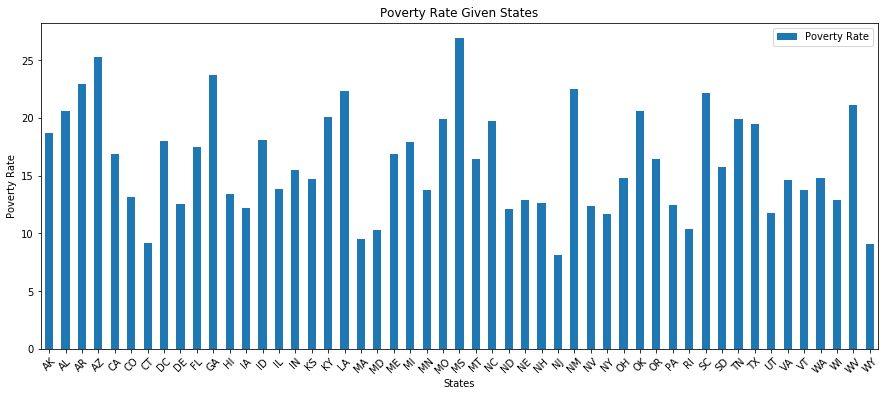

In [16]:
# with pandas
poverty_rate_of_state.plot(kind="bar",rot=45,figsize=(15,6),label="Poverty Rate")
plt.xlabel("States")
plt.ylabel("Poverty Rate")
plt.title("Poverty Rate Given States")
plt.legend();

**INSTRUCTION-3.a.2 : Plot Sorted Values With Pandas Built in method:**

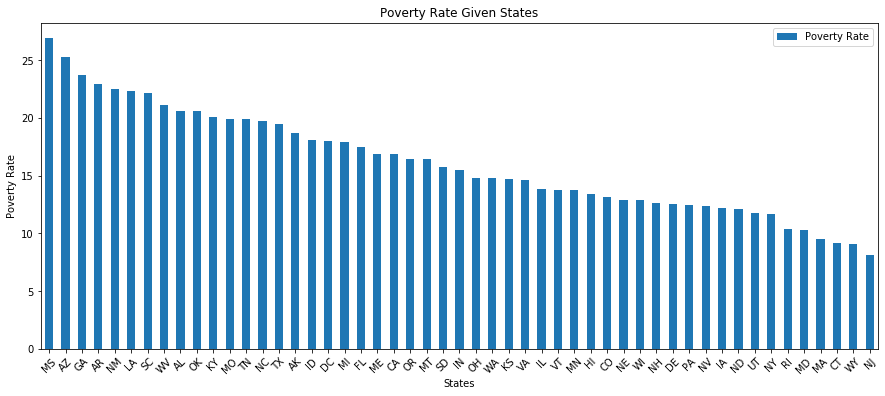

In [17]:
poverty_rate_of_state.sort_values(ascending=False).plot(kind="bar",rot=45,figsize=(15,6),label="Poverty Rate")
plt.xlabel("States")
plt.ylabel("Poverty Rate")
plt.title("Poverty Rate Given States")
plt.legend();

**INSTRUCTION-3.b : Plot Sorted Values With Matplotlib:** 

No handles with labels found to put in legend.


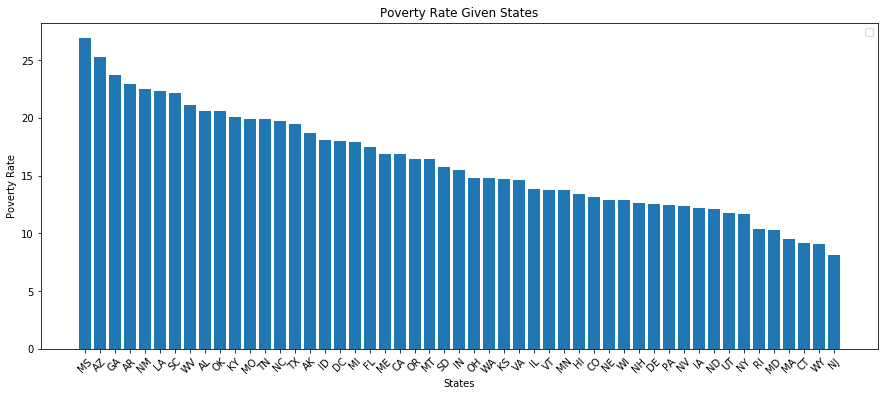

In [18]:
# with matplotlib
plt.figure(figsize=(15,6))
# plt.bar(x,height,data=)
plt.bar(poverty_rate_of_state.sort_values(ascending=False).index,poverty_rate_of_state.sort_values(ascending=False))
plt.xlabel("States")
plt.ylabel("Poverty Rate")
plt.title("Poverty Rate Given States")
plt.xticks(poverty_rate_of_state.sort_values().index, poverty_rate_of_state.sort_values().index, rotation=45)
plt.legend();

**INSTRUCTION-3.c : Plot Sorted Values With Seaborn** 

In [19]:
df=pd.DataFrame(poverty_rate_of_state.sort_values(ascending=True)).reset_index()
df.head()

,Geographic Area,poverty_rate
0,NJ,8.160917
1,WY,9.063725
2,CT,9.137500
3,MA,9.546341
4,MD,10.272394


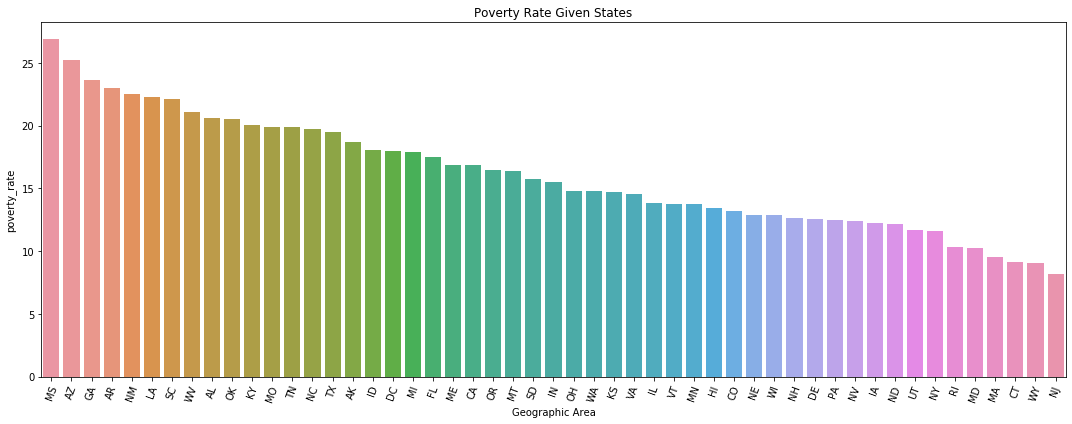

In [20]:
plt.figure(figsize=(15,6))
# 
sns.barplot(x="Geographic Area", y="poverty_rate", data=df, order=df.sort_values("poverty_rate",ascending=False)["Geographic Area"])
plt.xticks(rotation=70)
plt.title("Poverty Rate Given States")
plt.tight_layout();

## 2. Most common 15 Name or Surname of killed people 

In [21]:
kill.head()

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera
0,3,Tim Elliot,02/01/15,shot,gun,53.0,M,A,Shelton,WA,True,attack,Not fleeing,False
1,4,Lewis Lee Lembke,02/01/15,shot,gun,47.0,M,W,Aloha,OR,False,attack,Not fleeing,False
2,5,John Paul Quintero,03/01/15,shot and Tasered,unarmed,23.0,M,H,Wichita,KS,False,other,Not fleeing,False
3,8,Matthew Hoffman,04/01/15,shot,toy weapon,32.0,M,W,San Francisco,CA,True,attack,Not fleeing,False
4,9,Michael Rodriguez,04/01/15,shot,nail gun,39.0,M,H,Evans,CO,False,attack,Not fleeing,False


In [22]:
kill.name.value_counts()

TK TK                       49
Brandon Jones                2
Michael Johnson              2
Eric Harris                  2
Daquan Antonio Westbrook     2
                            ..
Medger Blake                 1
Angelo West                  1
Martice Milliner             1
Ruben Jose Herrera           1
Sylville Smith               1
Name: name, Length: 2481, dtype: int64

In [23]:
# Problem: TK TK is most probably not a name or surname. We will clean them.
pairs = kill.name[kill.name != 'TK TK'].str.split()
pairs.head()

0             [Tim, Elliot]
1      [Lewis, Lee, Lembke]
2    [John, Paul, Quintero]
3        [Matthew, Hoffman]
4      [Michael, Rodriguez]
Name: name, dtype: object

**INSTRUCTION : Plot Most common 15 Name or Surname of killed people** 

In [24]:
names=pairs.apply(lambda x: x[0]).value_counts()
surnames=pairs.apply(lambda x: x[-1]).value_counts()

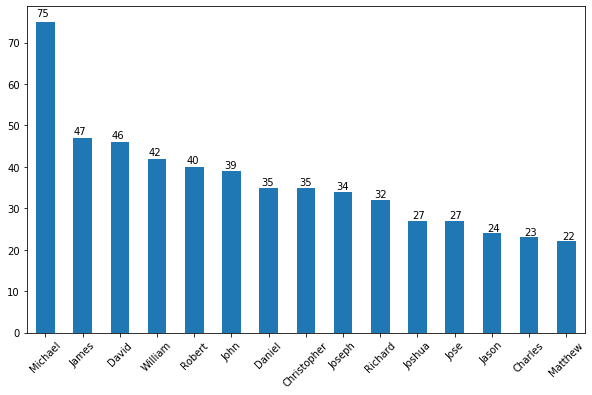

In [25]:
ax=names[:15].plot(kind="bar", rot=45,figsize=(10,6))

for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.01, p.get_height() * 1.02));

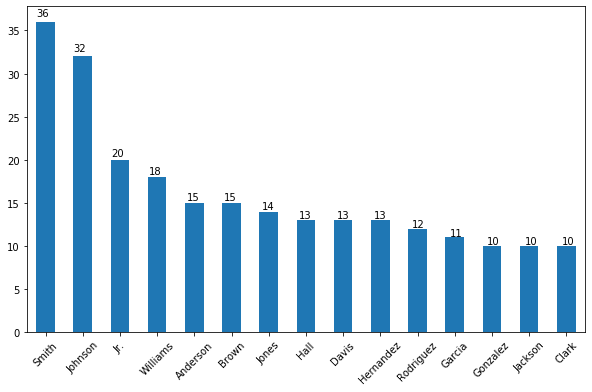

In [26]:

ax=surnames[:15].plot(kind="bar", rot=45,figsize=(10,6));

for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.01, p.get_height() * 1.02));

In [27]:
# Alternative Solution with collections Module

names_surnames=pairs.map(lambda x: (x[0],x[-1]))
names,surnames=zip(*names_surnames)

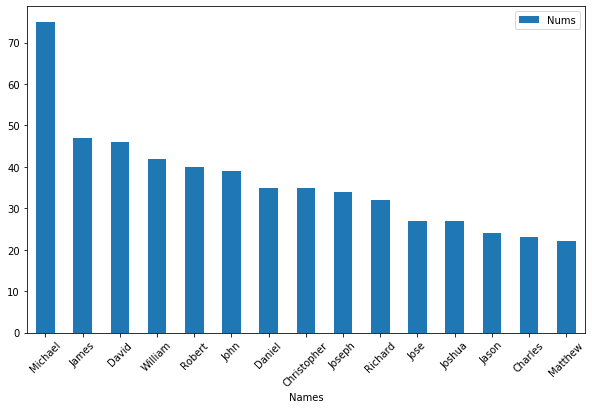

In [28]:
from collections import Counter

cnt = Counter()
for name in names:
    #cnt[name] += 1
    cnt.update([name])
names_df=pd.DataFrame(cnt.most_common(15),columns=["Names","Nums"])
names_df.plot.bar(x="Names",y="Nums",rot=45,figsize=(10,6));

## 3. Killed People According to Races (Pie Chart)

In [29]:
kill.head()

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera
0,3,Tim Elliot,02/01/15,shot,gun,53.0,M,A,Shelton,WA,True,attack,Not fleeing,False
1,4,Lewis Lee Lembke,02/01/15,shot,gun,47.0,M,W,Aloha,OR,False,attack,Not fleeing,False
2,5,John Paul Quintero,03/01/15,shot and Tasered,unarmed,23.0,M,H,Wichita,KS,False,other,Not fleeing,False
3,8,Matthew Hoffman,04/01/15,shot,toy weapon,32.0,M,W,San Francisco,CA,True,attack,Not fleeing,False
4,9,Michael Rodriguez,04/01/15,shot,nail gun,39.0,M,H,Evans,CO,False,attack,Not fleeing,False


In [30]:
kill.race.unique()

array(['A', 'W', 'H', 'B', 'O', nan, 'N'], dtype=object)

In [31]:
kill.race.value_counts()

W    1201
B     618
H     423
A      39
N      31
O      28
Name: race, dtype: int64

In [32]:
kill.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2535 entries, 0 to 2534
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       2535 non-null   int64  
 1   name                     2535 non-null   object 
 2   date                     2535 non-null   object 
 3   manner_of_death          2535 non-null   object 
 4   armed                    2526 non-null   object 
 5   age                      2458 non-null   float64
 6   gender                   2535 non-null   object 
 7   race                     2340 non-null   object 
 8   city                     2535 non-null   object 
 9   state                    2535 non-null   object 
 10  signs_of_mental_illness  2535 non-null   bool   
 11  threat_level             2535 non-null   object 
 12  flee                     2470 non-null   object 
 13  body_camera              2535 non-null   bool   
dtypes: bool(2), float64(1), 

In [33]:
kill.isnull().sum()

id                           0
name                         0
date                         0
manner_of_death              0
armed                        9
age                         77
gender                       0
race                       195
city                         0
state                        0
signs_of_mental_illness      0
threat_level                 0
flee                        65
body_camera                  0
dtype: int64

Problem: missing value on race column.

**INSTRUCTION-1: Drop the all raws that contain missing value (dropna)**

In [34]:
kill.dropna(inplace=True)

In [35]:
kill.isnull().sum()

id                         0
name                       0
date                       0
manner_of_death            0
armed                      0
age                        0
gender                     0
race                       0
city                       0
state                      0
signs_of_mental_illness    0
threat_level               0
flee                       0
body_camera                0
dtype: int64

**INSTRUCTION-2: Demonstrate Race Ratio of Killed People by a Pie Chart**

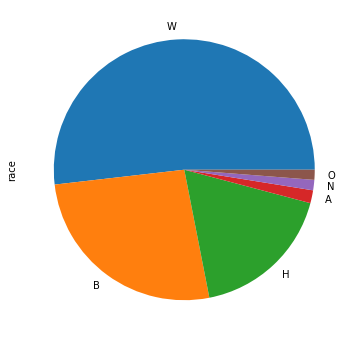

In [36]:
# with pandas
kill.race.value_counts().plot(kind="pie", figsize=(10,6));

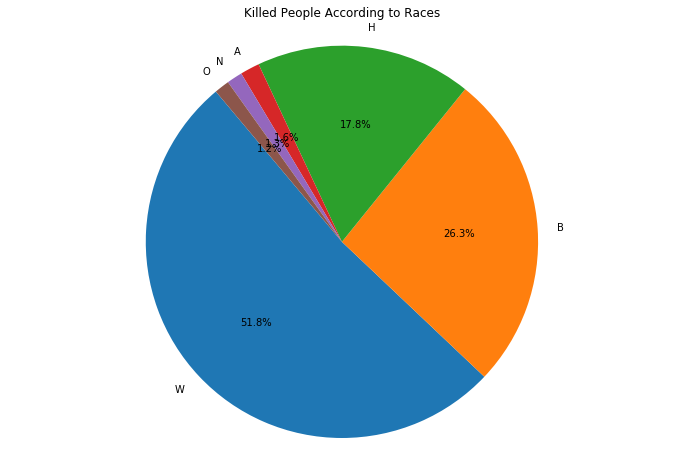

In [37]:
# with matplotlib
df=pd.DataFrame(kill.race.value_counts())
labels=df.index
sizes=df.race

fig, ax = plt.subplots(figsize=(12,8))

ax.pie(sizes, labels=labels, autopct='%1.1f%%',startangle=130)
ax.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
ax.set_title("Killed People According to Races")
plt.show()

In [38]:
# with seaborn



## 4a.Box plot of age in both genders separeted by manner of death.

In [39]:
kill.head()

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera
0,3,Tim Elliot,02/01/15,shot,gun,53.0,M,A,Shelton,WA,True,attack,Not fleeing,False
1,4,Lewis Lee Lembke,02/01/15,shot,gun,47.0,M,W,Aloha,OR,False,attack,Not fleeing,False
2,5,John Paul Quintero,03/01/15,shot and Tasered,unarmed,23.0,M,H,Wichita,KS,False,other,Not fleeing,False
3,8,Matthew Hoffman,04/01/15,shot,toy weapon,32.0,M,W,San Francisco,CA,True,attack,Not fleeing,False
4,9,Michael Rodriguez,04/01/15,shot,nail gun,39.0,M,H,Evans,CO,False,attack,Not fleeing,False


In [40]:
kill.manner_of_death.unique()

array(['shot', 'shot and Tasered'], dtype=object)

**INSTRUCTION: Demonstrate the Qurtiles of age in both genders separeted by manner of death.**

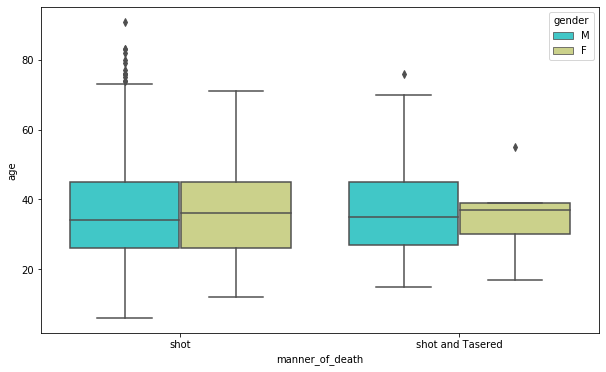

In [41]:
plt.figure(figsize=(10,6))
sns.boxplot(x="manner_of_death", y="age", data=kill,palette='rainbow',hue="gender");

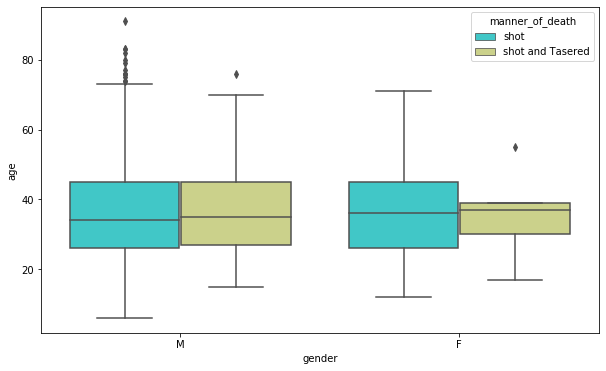

In [42]:
# alternative
plt.figure(figsize=(10,6))
sns.boxplot(x="gender", y="age", data=kill,palette='rainbow',hue="manner_of_death");

## 4b. Swarm Plot (Do not use in large datasets. The memory will not be enogh!)

**INSTRUCTION: Demonstrate the age in both genders separeted by manner of death by a swarm plot.**

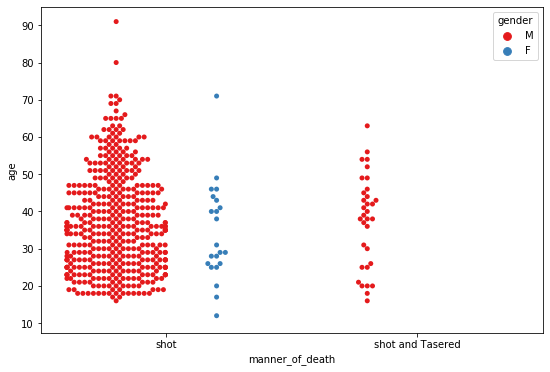

In [43]:
plt.figure(figsize=(9,6))
sns.swarmplot(x="manner_of_death", y="age",hue='gender',data=kill.sample(500, random_state=101), palette="Set1", split=True);

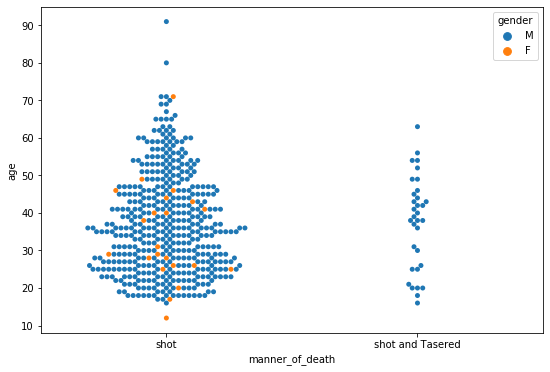

In [44]:
plt.figure(figsize=(9,6))
sns.swarmplot(x="manner_of_death", y="age",hue='gender',data=kill.sample(500, random_state=101));

## 5. Kill properties (Count Plots)

**INSTRUCTION-1: Plot number of poeple by gender**

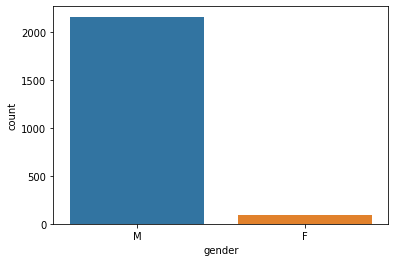

In [45]:
sns.countplot(x="gender",data=kill);

**INSTRUCTION-2: Plot 7 most common kill weapons**

In [46]:
kill.armed.value_counts()

gun                    1247
knife                   324
unarmed                 165
vehicle                 158
toy weapon              102
                       ... 
pen                       1
hand torch                1
chain                     1
straight edge razor       1
flashlight                1
Name: armed, Length: 67, dtype: int64

In [47]:
common_weapons=pd.DataFrame(kill.armed.value_counts()).reset_index()
common_weapons.head()

,index,armed
0,gun,1247
1,knife,324
2,unarmed,165
3,vehicle,158
4,toy weapon,102


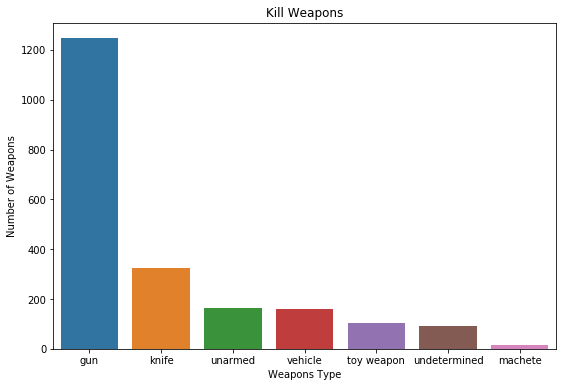

In [48]:
plt.figure(figsize=(9,6))
sns.barplot(x="index",y="armed",data=common_weapons[:7])
plt.xlabel("Weapons Type")
plt.ylabel("Number of Weapons")
plt.title("Kill Weapons");

**INSTRUCTION-3: Plot number of age of killed people under two groups : Under 25 and Above 25**

In [49]:
killed_by_age={"above25":[kill[kill.age>25].shape[0]],"under25":[kill[kill.age<=25].shape[0]]}

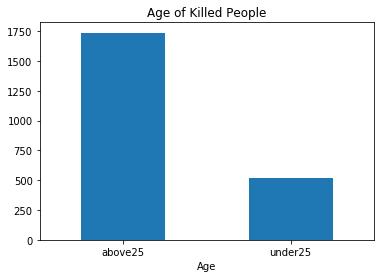

In [50]:
pd.DataFrame(killed_by_age).T.plot.bar(legend=False,rot=0,title="Age of Killed People")
plt.xlabel("Age");

**INSTRUCTION-4: Plot number of killed poeple by race**

In [51]:
df=kill.groupby("race").count().sort_values("id",ascending=False)
df

,id,name,date,manner_of_death,armed,age,gender,city,state,signs_of_mental_illness,threat_level,flee,body_camera
race,,,,,,,,,,,,,
W,1168,1168,1168,1168,1168,1168,1168,1168,1168,1168,1168,1168,1168
B,592,592,592,592,592,592,592,592,592,592,592,592,592
H,401,401,401,401,401,401,401,401,401,401,401,401,401
A,36,36,36,36,36,36,36,36,36,36,36,36,36
N,29,29,29,29,29,29,29,29,29,29,29,29,29
O,28,28,28,28,28,28,28,28,28,28,28,28,28


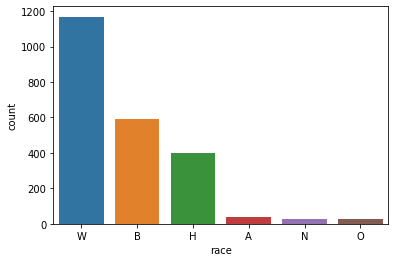

In [52]:
# with barplot
sns.barplot(x=df.index, y="id", data=df);
plt.ylabel("count");

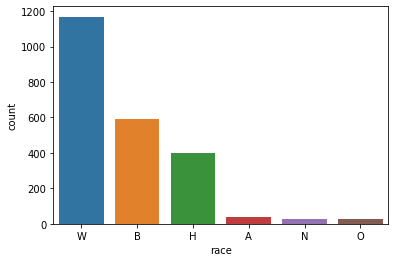

In [53]:
# with countplot
sns.countplot(x="race",data=kill, order=kill.race.value_counts().index);

**INSTRUCTION-5: Plot 12 most dangerous cities**

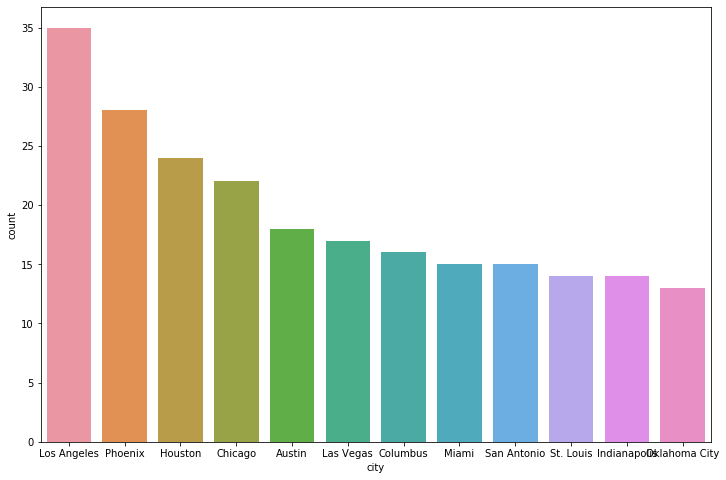

In [54]:
plt.figure(figsize=(12,8))
sns.countplot(x="city", data=kill, order=kill.city.value_counts()[:12].index);

**INSTRUCTION-6: Plot 20 most dangerous states**

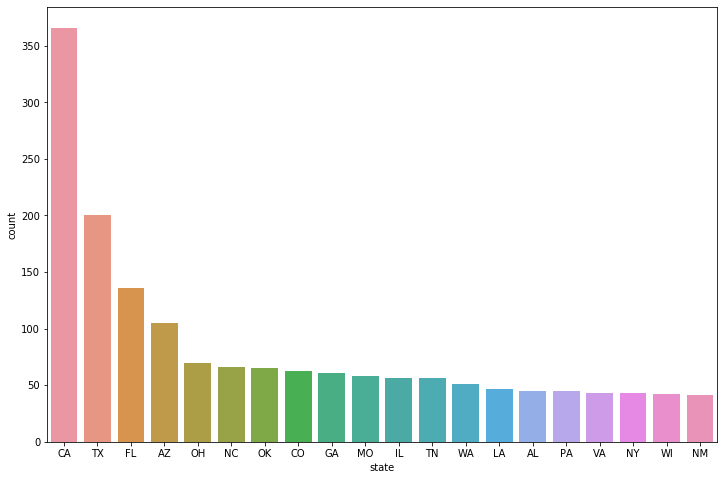

In [55]:
plt.figure(figsize=(12,8))
sns.countplot(x="state", data=kill, order=kill.state.value_counts()[:20].index);

**INSTRUCTION-7: Plot Having mental ilness or not for killed people**

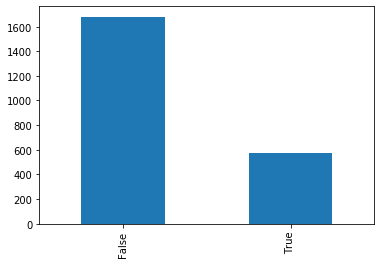

In [56]:
# with pandas
kill.signs_of_mental_illness.value_counts().plot.bar();

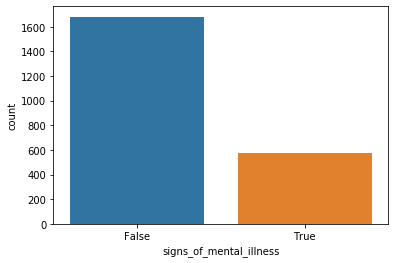

In [57]:
# with seaborn
sns.countplot(x="signs_of_mental_illness",data=kill);


**INSTRUCTION-8: Plot number of Threat Types**

In [58]:
kill.threat_level.value_counts()

attack          1462
other            677
undetermined     115
Name: threat_level, dtype: int64

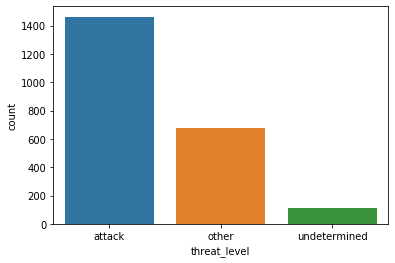

In [59]:
sns.countplot(x="threat_level", data=kill);

**INSTRUCTION-9: Plot number of Flee Types**

In [60]:
kill.flee.value_counts()

Not fleeing    1528
Car             360
Foot            278
Other            88
Name: flee, dtype: int64

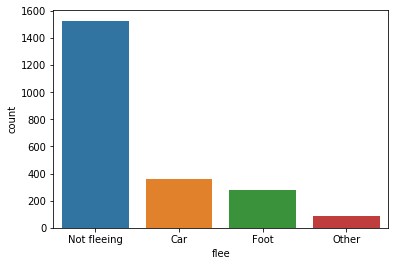

In [61]:
sns.countplot(x="flee", data=kill);